<span style="font-size: 30px;">

**Hypothesis Testing**

</span>

As part of your analysis, you’ll conduct hypothesis testing to make data-driven conclusions about the effectiveness of the redesign. See the full details below:

Completion Rate
Given the data and KPIs you have explored discussed, one interesting hypothesis to test is related to the completion rate between the Test and Control groups. Since the new design (Test group) had a higher completion rate compared to the old design (Control group), you are required to confirm if this difference is statistically significant.

Make sure to define the proper null and an alternative hypothesis to test it. Use the provided data to test these hypotheses, and determine if you can reject the null hypothesis in favor of the alternative. Make sure to consider the significance level, p-value, the statistical test prerequisites, and other relevant statistical measures in your analysis.

Completion Rate with a Cost-Effectiveness Threshold
The introduction of a new UI design comes with its associated costs: design, development, testing, potential training for staff, and possible short-term disruptions or adjustments for users. To justify these costs, Vanguard has determined that any new design should lead to a minimum increase in the completion rate to be deemed cost-effective.

Threshold: Vanguard has set this minimum increase in completion rate at 5%. This is the rate at which the projected benefits, in terms of increased user engagement and potential revenue, are estimated to outweigh the costs of the new design.

You are required to carry out another analysis, ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold. If the new design doesn’t lead to at least this level of improvement, it may not be justifiable from a cost perspective, regardless of its statistical significance.

Other Hypothesis Examples
You have been given the freedom to choose another hypothesis to test. Here are some examples:

You might want to test whether the average age of clients engaging with the new process is the same as those engaging with the old process
You might want to test if the average client tenure (how long they’ve been with Vanguard) of those engaging with the new process is the same as those engaging with the old process
You might want to test if there are gender differences that affect engaging with the new or old process
Make sure to define the proper null and alternative hypothesis to test it. You are required to choose one or come up with another of your own to test.





    **Experiment Evaluation**

You are also required to carry out an evaluation of the experiment by answering questions about the design effectiveness, duration and any additional data needs. See the full details below:

Design Effectiveness
Was the experiment well-structured?
Were clients randomly and equally divided between the old and new designs?
Were there any biases?
Duration Assessment
Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?

Additional Data Needs
What other data, if available, could enhance the analysis?

In [1]:
import pandas as pd


df_gold_test = pd.read_excel("Data_gold_test_steps.xlsx")
df_gold_control = pd.read_excel("Data_gold_control_steps.xlsx")

In [2]:
df_gold_test

,client_id,Variation,visit_id,confirm,start,step_1,step_2,step_3,complete,Error
0,346781,Test,138480024_16310699196_180947,1,1,1,1,1,1.0,0
1,6038525,Test,160662411_47414103546_387098,1,1,1,1,1,1.0,0
2,6219677,Test,402500490_59473331055_178140,1,3,3,4,2,1.0,1
3,6219677,Test,733647053_97830081870_147132,0,4,4,4,2,0.0,1
4,6219677,Test,237397313_76996853966_974538,0,3,2,2,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...
5553,5492897,Test,772609923_69272363513_45475,1,1,1,1,1,1.0,0
5554,5492897,Test,476101525_35474335958_420184,1,0,0,0,0,NaN,1
5555,9684806,Test,304868249_69734281141_323816,0,3,2,1,1,0.0,1
5556,4084839,Test,800911487_42591652049_196692,1,1,1,1,1,1.0,0


In [3]:
df_gold_control

,client_id,Variation,visit_id,confirm,start,step_1,step_2,step_3,complete,Error
0,7946939,Control,819610789_74349965849_582778,1,1,1,1,1,1.0,0
1,7179800,Control,834345684_20753053466_629354,3,2,1,1,1,NaN,1
2,7679428,Control,377121016_67032089535_295299,0,2,0,0,0,0.0,1
3,7679428,Control,702065802_57911235390_499219,1,1,1,1,1,1.0,0
4,3654308,Control,726496682_33297666610_800081,0,1,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
4750,1550660,Control,143274221_81838514499_21074,0,1,1,0,0,0.0,1
4751,2833480,Control,715082992_31158513777_974487,0,1,1,0,0,0.0,1
4752,8881896,Control,740631430_6221639850_832960,1,1,1,2,1,1.0,1
4753,8023625,Control,710520941_37998535484_436282,0,1,0,0,0,0.0,1


In [4]:
# Define metrics
test_completion_rate = df_gold_test['complete'].value_counts(normalize=True)
control_completion_rate = df_gold_control['complete'].value_counts(normalize=True)

# Calculate completion rates
print("Control Group Completion Rate:", control_completion_rate)

print("__________________________________")
print("")
print("Test Group Completion Rate:", test_completion_rate)

Control Group Completion Rate: complete
0.0    0.520629
1.0    0.476408
2.0    0.001824
3.0    0.000912
4.0    0.000228
Name: proportion, dtype: float64
__________________________________

Test Group Completion Rate: complete
1.0    0.531151
0.0    0.457481
2.0    0.010459
4.0    0.000455
3.0    0.000455
Name: proportion, dtype: float64


In [5]:
import numpy as np
from scipy import stats


def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")


control_completion_rate1 = df_gold_control['complete'].value_counts()
test_completion_rate1 = df_gold_test['complete'].value_counts()
check_normality(control_completion_rate1)

p value:0.0127
Reject null hypothesis >> The data is not normally distributed


**- Visualize outcomes**

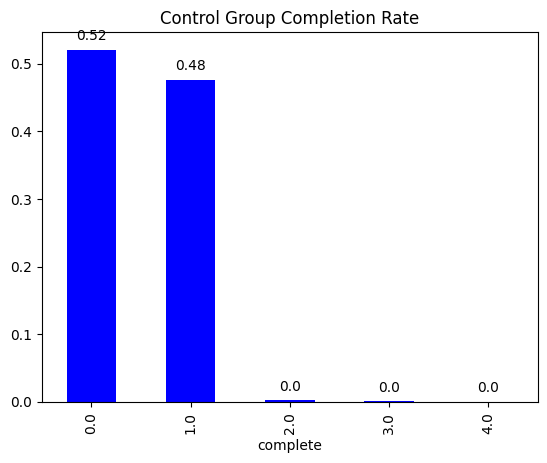

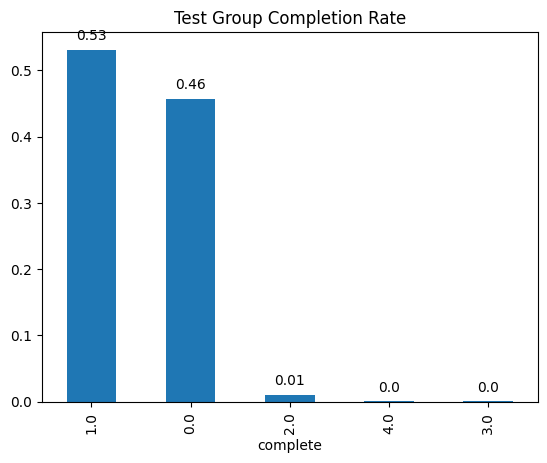

In [6]:
import matplotlib.pyplot as plt

# Visualize outcomes for Control Group
ax1 = control_completion_rate.plot(kind='bar', title='Control Group Completion Rate', cmap='brg')
for i, v in enumerate(control_completion_rate):
    ax1.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

# Visualize outcomes for Test Group
ax2 = test_completion_rate.plot(kind='bar', title='Test Group Completion Rate')
for i, v in enumerate(test_completion_rate):
    ax2.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [7]:
from scipy.stats import ttest_ind

# Convertendo as colunas para o tipo string
control_process_steps = df_gold_control['complete'].astype(str).str.extract('(\\d+)', expand=False).fillna(-1).astype(float)

test_process_steps = df_gold_test['complete'].astype(str).str.extract('(\\d+)', expand=False).fillna(-1).astype(float)

# Perform hypothesis test
t_stat, p_value = ttest_ind(control_process_steps, test_process_steps)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 9.732338718338434
P-value: 2.7370390844602403e-22


The T-statistic measures the difference between the means of the two samples relative to the variation in the samples. In this case, a T-statistic of 9.73 indicates a large difference between the means of the two groups.

The P-value is a measure of the evidence against a null hypothesis. A P-value of 2.74e-22 (or 0.000000000000000000000274) is extremely small, indicating strong evidence against the null hypothesis. In practical terms, this suggests that there is a very low probability that the observed difference between the two groups is due to random chance. Therefore, it is likely that the difference is statistically significant.